**IMPORT DATASET**

In [124]:
from sklearn.datasets import load_iris
iris = load_iris()

In [125]:
import pandas as pd
X = pd.DataFrame(iris.data, columns=iris.feature_names)  
y = pd.Series(iris.target)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [126]:
df = X.copy()
df['target'] = y    # Add target column to the DataFrame
df.head()

# df will be used to train the model

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Visualizing dataset structure

Text(0, 0.5, 'Count')

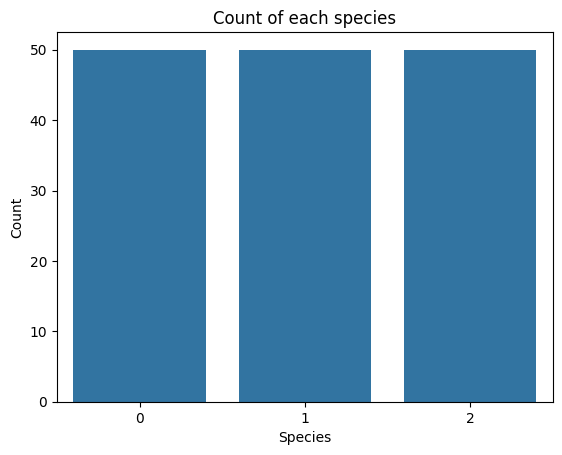

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['target'])
plt.title('Count of each species')
plt.xlabel('Species')
plt.ylabel('Count')
# 0 1 2 numbers for each species

Pairwise feature relationship

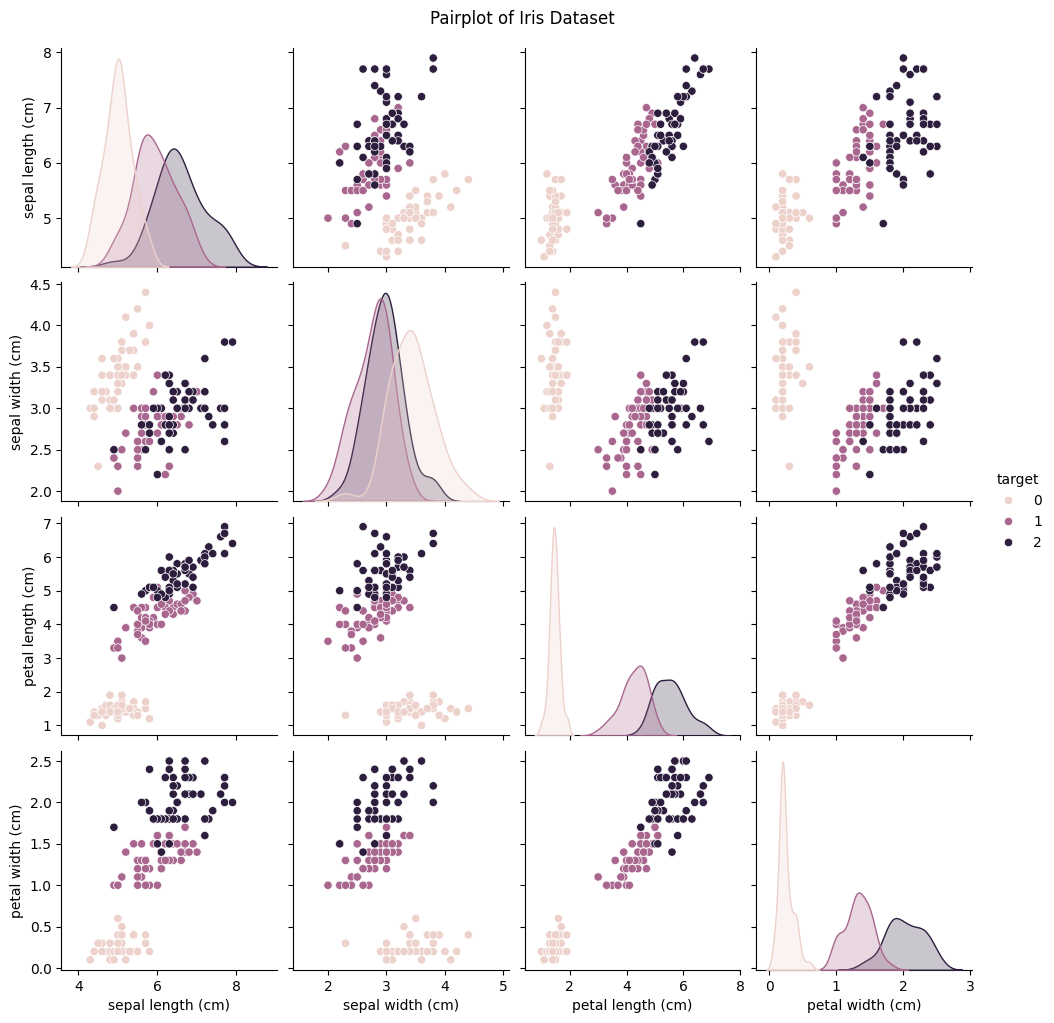

In [128]:
sns.pairplot(df, hue='target')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

Coorelation Heatmap

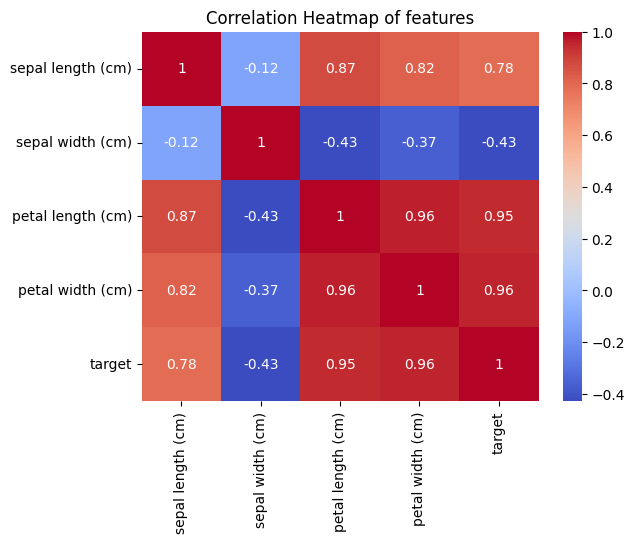

In [129]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of features')
plt.show()

DATA PREPROCESSING

In [130]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [131]:
# Scale the features using StandardScaler
# to have mean = 0 and standard deviation = 1
# This is important for many machine learning algorithms to perform well

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



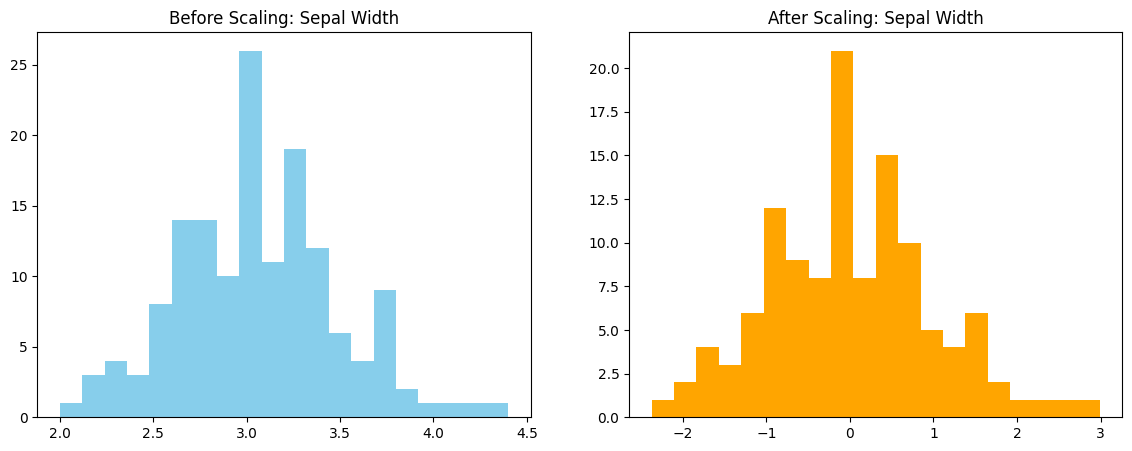

In [132]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
 
ax[0].hist(X.iloc[:, 1], bins=20, color="skyblue")
ax[0].set_title('Before Scaling: Sepal Width')

ax[1].hist(X_train_scaled[:, 1], bins=20, color="orange")
ax[1].set_title('After Scaling: Sepal Width')

plt.show()


IMPLEMENTING THE BEST SUITED MODEL FOR THIS CASE

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  # Create a KNN classifier with 3 neighbors
knn.fit(X_train_scaled, y_train)  # Fit the model on the training data
y_pred = knn.predict(X_test_scaled)  # Predict on the test data

In [134]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train_scaled, y_train)  # Fit the model on the training data
y_pred_tree = tree.predict(X_test_scaled)  # Predict on the test data

VISUALIZING MODEL EVALUATION

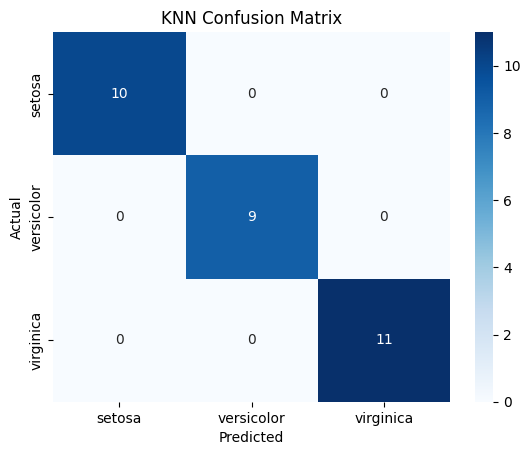

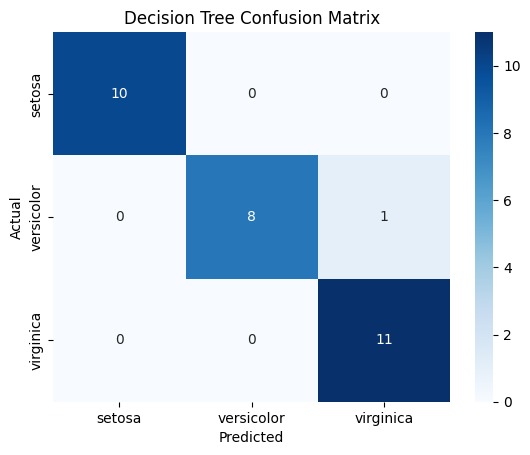

In [135]:
# Confuse matrix Heatmap for both models
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(y_test, y_pred, title='KNN Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_tree, title='Decision Tree Confusion Matrix')

CLASSIFICATION REPORT

In [136]:
print("KNN Accuracy:", knn.score(X_test_scaled, y_test))
print("Decision Tree Accuracy:", tree.score(X_test_scaled, y_test))

KNN Accuracy: 1.0
Decision Tree Accuracy: 0.9666666666666667


In [137]:
from sklearn.metrics import classification_report
print('KNN Report:\n', classification_report(y_test, y_pred, target_names=iris.target_names))
print('Decision Tree Report:\n', classification_report(y_test, y_pred_tree, target_names=iris.target_names))

KNN Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

